In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from seaborn import violinplot


In [9]:
df = pd.read_csv("./../data/penguins_size.csv")
df.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE


In [11]:
df.shape

(344, 7)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   culmen_length_mm   342 non-null    float64
 3   culmen_depth_mm    342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                334 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


In [13]:
df.describe()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
count,342.000000,342.000000,342.000000,342.000000
mean,43.921930,17.151170,200.915205,4201.754386
std,5.459584,1.974793,14.061714,801.954536
min,32.100000,13.100000,172.000000,2700.000000
25%,39.225000,15.600000,190.000000,3550.000000
50%,44.450000,17.300000,197.000000,4050.000000
75%,48.500000,18.700000,213.000000,4750.000000
max,59.600000,21.500000,231.000000,6300.000000


In [14]:
df.species.unique()

array(['Adelie', 'Chinstrap', 'Gentoo'], dtype=object)

In [15]:
df.island.unique()

array(['Torgersen', 'Biscoe', 'Dream'], dtype=object)

In [16]:
df.species.value_counts()

species
Adelie       152
Gentoo       124
Chinstrap     68
Name: count, dtype: int64

In [17]:
df.island.value_counts()

island
Biscoe       168
Dream        124
Torgersen     52
Name: count, dtype: int64

In [19]:
# tabla que indica la cantidad de especies por isla
species_island = df.groupby(['species', 'island']).size().reset_index(name='counts')
species_island

,species,island,counts
0,Adelie,Biscoe,44
1,Adelie,Dream,56
2,Adelie,Torgersen,52
3,Chinstrap,Dream,68
4,Gentoo,Biscoe,124


# Filtar datos

In [28]:
#filtar por sexo
df_filtered = df[df["sex"].isin(["MALE", "FEMALE"])]
df_filtered

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,MALE
...,...,...,...,...,...,...,...
338,Gentoo,Biscoe,47.2,13.7,214.0,4925.0,FEMALE
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,FEMALE
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,MALE
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,FEMALE


In [37]:
df_filtered = pd.get_dummies(df_filtered, columns=["sex"])
df_filtered

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex_FEMALE,sex_MALE
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,False,True
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,True,False
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,True,False
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,True,False
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,False,True
...,...,...,...,...,...,...,...,...
338,Gentoo,Biscoe,47.2,13.7,214.0,4925.0,True,False
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,True,False
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,False,True
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,True,False


S# Graficos

<Axes: xlabel='species', ylabel='body_mass_g'>

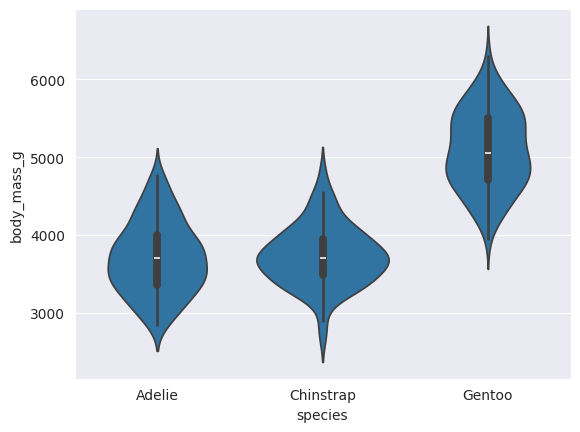

In [42]:
violinplot(x=df_filtered["species"], y=df_filtered["body_mass_g"])S

<Axes: xlabel='species', ylabel='flipper_length_mm'>

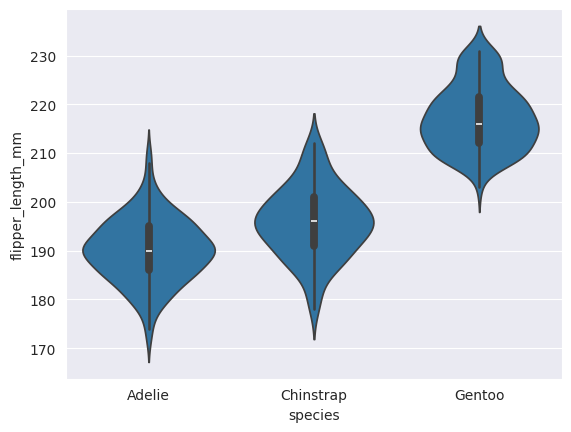

In [43]:
violinplot(x=df_filtered["species"], y=df_filtered["flipper_length_mm"])